In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
# Preparation
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression


#import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier,HistGradientBoostingRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier,LGBMRegressor
import lightgbm as lgbm
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
import category_encoders as ce
#import smong
import os
import warnings
# import optuna
from joblib import Parallel, delayed
import joblib
import logging
from tqdm import tqdm
from sklearn import set_config
from abc import ABC, abstractmethod
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')

c:\users\triet\bai5\venv\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Load Dataset

In [2]:
%%time
# import lux
# Load the training data
train = pd.read_csv("creditcard.csv")
# Preview the data
train.head(3)

CPU times: total: 1.17 s
Wall time: 2.13 s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name

        if col_type != object and col_type.name != 'category':
        #if name != "category":
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
train= reduce_mem_usage(train)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


In [5]:
# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)
# IQR = Q3 - Q1
# train_num=train.select_dtypes(exclude=['category'])
# df_out= train[~(((train_num < (Q1 - 1.5 * IQR))|(train_num > (Q3 + 1.5 * IQR))) & train['isFraud']!=1).any(axis=1)]


In [8]:
train_df = train

In [7]:
train_df.dtypes

Time      float32
V1        float16
V2        float16
V3        float16
V4        float16
V5        float16
V6        float16
V7        float16
V8        float16
V9        float16
V10       float16
V11       float16
V12       float16
V13       float16
V14       float16
V15       float16
V16       float16
V17       float16
V18       float16
V19       float16
V20       float16
V21       float16
V22       float16
V23       float16
V24       float16
V25       float16
V26       float16
V27       float16
V28       float16
Amount    float16
Class        int8
dtype: object

## Check Missing Data

In [9]:
for i in range(train_df.shape[1]):
    # count number of rows with missing values
    n_miss = train_df.iloc[:,i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (train_df.columns[i], n_miss, perc))

> Time, Missing: 0 (0.0%)
> V1, Missing: 0 (0.0%)
> V2, Missing: 0 (0.0%)
> V3, Missing: 0 (0.0%)
> V4, Missing: 0 (0.0%)
> V5, Missing: 0 (0.0%)
> V6, Missing: 0 (0.0%)
> V7, Missing: 0 (0.0%)
> V8, Missing: 0 (0.0%)
> V9, Missing: 0 (0.0%)
> V10, Missing: 0 (0.0%)
> V11, Missing: 0 (0.0%)
> V12, Missing: 0 (0.0%)
> V13, Missing: 0 (0.0%)
> V14, Missing: 0 (0.0%)
> V15, Missing: 0 (0.0%)
> V16, Missing: 0 (0.0%)
> V17, Missing: 0 (0.0%)
> V18, Missing: 0 (0.0%)
> V19, Missing: 0 (0.0%)
> V20, Missing: 0 (0.0%)
> V21, Missing: 0 (0.0%)
> V22, Missing: 0 (0.0%)
> V23, Missing: 0 (0.0%)
> V24, Missing: 0 (0.0%)
> V25, Missing: 0 (0.0%)
> V26, Missing: 0 (0.0%)
> V27, Missing: 0 (0.0%)
> V28, Missing: 0 (0.0%)
> Amount, Missing: 0 (0.0%)
> Class, Missing: 0 (0.0%)


## Remove Low Variance and High Correlation Feature

In [8]:
var= train.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(10)

,var
V15,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0
V21,0.0
V20,0.0
V19,0.0
V18,0.0


# Split Dataset

In [10]:
target= "Class"
X = train_df.drop(target, axis='columns')# axis=1
y = train_df[target].to_numpy()

In [11]:
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns


# Data Pipeline

In [53]:
from sklearn.utils import resample

def Balance(X, y, random_state = None):
    X_minority = X[y == 1]
    X_majority = X[y == 0]

    X_minority_resample = resample(X_minority, replace = True, n_samples = X_majority.shape[0], random_state = random_state)
    X_resampled = np.vstack((X_minority_resample, X_majority))

    y_minority_resampled = np.ones((X_majority.shape[0], 1), dtype = int)
    y_majority = np.zeros((X_majority.shape[0], 1), dtype = int)
    y_resampled = np.vstack((y_minority_resampled, y_majority))

    data = np.hstack((X_resampled, y_resampled))
    np.random.shuffle(data)
    X = data[:, :-1]
    y = data[:, -1].astype(int)
    return X, y

In [54]:
# Cat columns:
cat_pipe = Pipeline([
                     ('Encoder',ce.target_encoder.TargetEncoder())

                    ])
#Num_columns:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median',add_indicator=False)),
                     ('scaler', QuantileTransformer())
                    ])
#Feature Union fitting training data :
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])
# Using ColumnTransformer:
data_cleaning = ColumnTransformer([
    ('cat_columns',  cat_pipe, cat_columns ),
    ('num_columns', num_pipe , num_columns)
])

def create_pipeline(model,preprocessor):
    pipeline = Pipeline([
        ('pre', preprocessor),
        ('lgbm', model)
    ])
    return pipeline



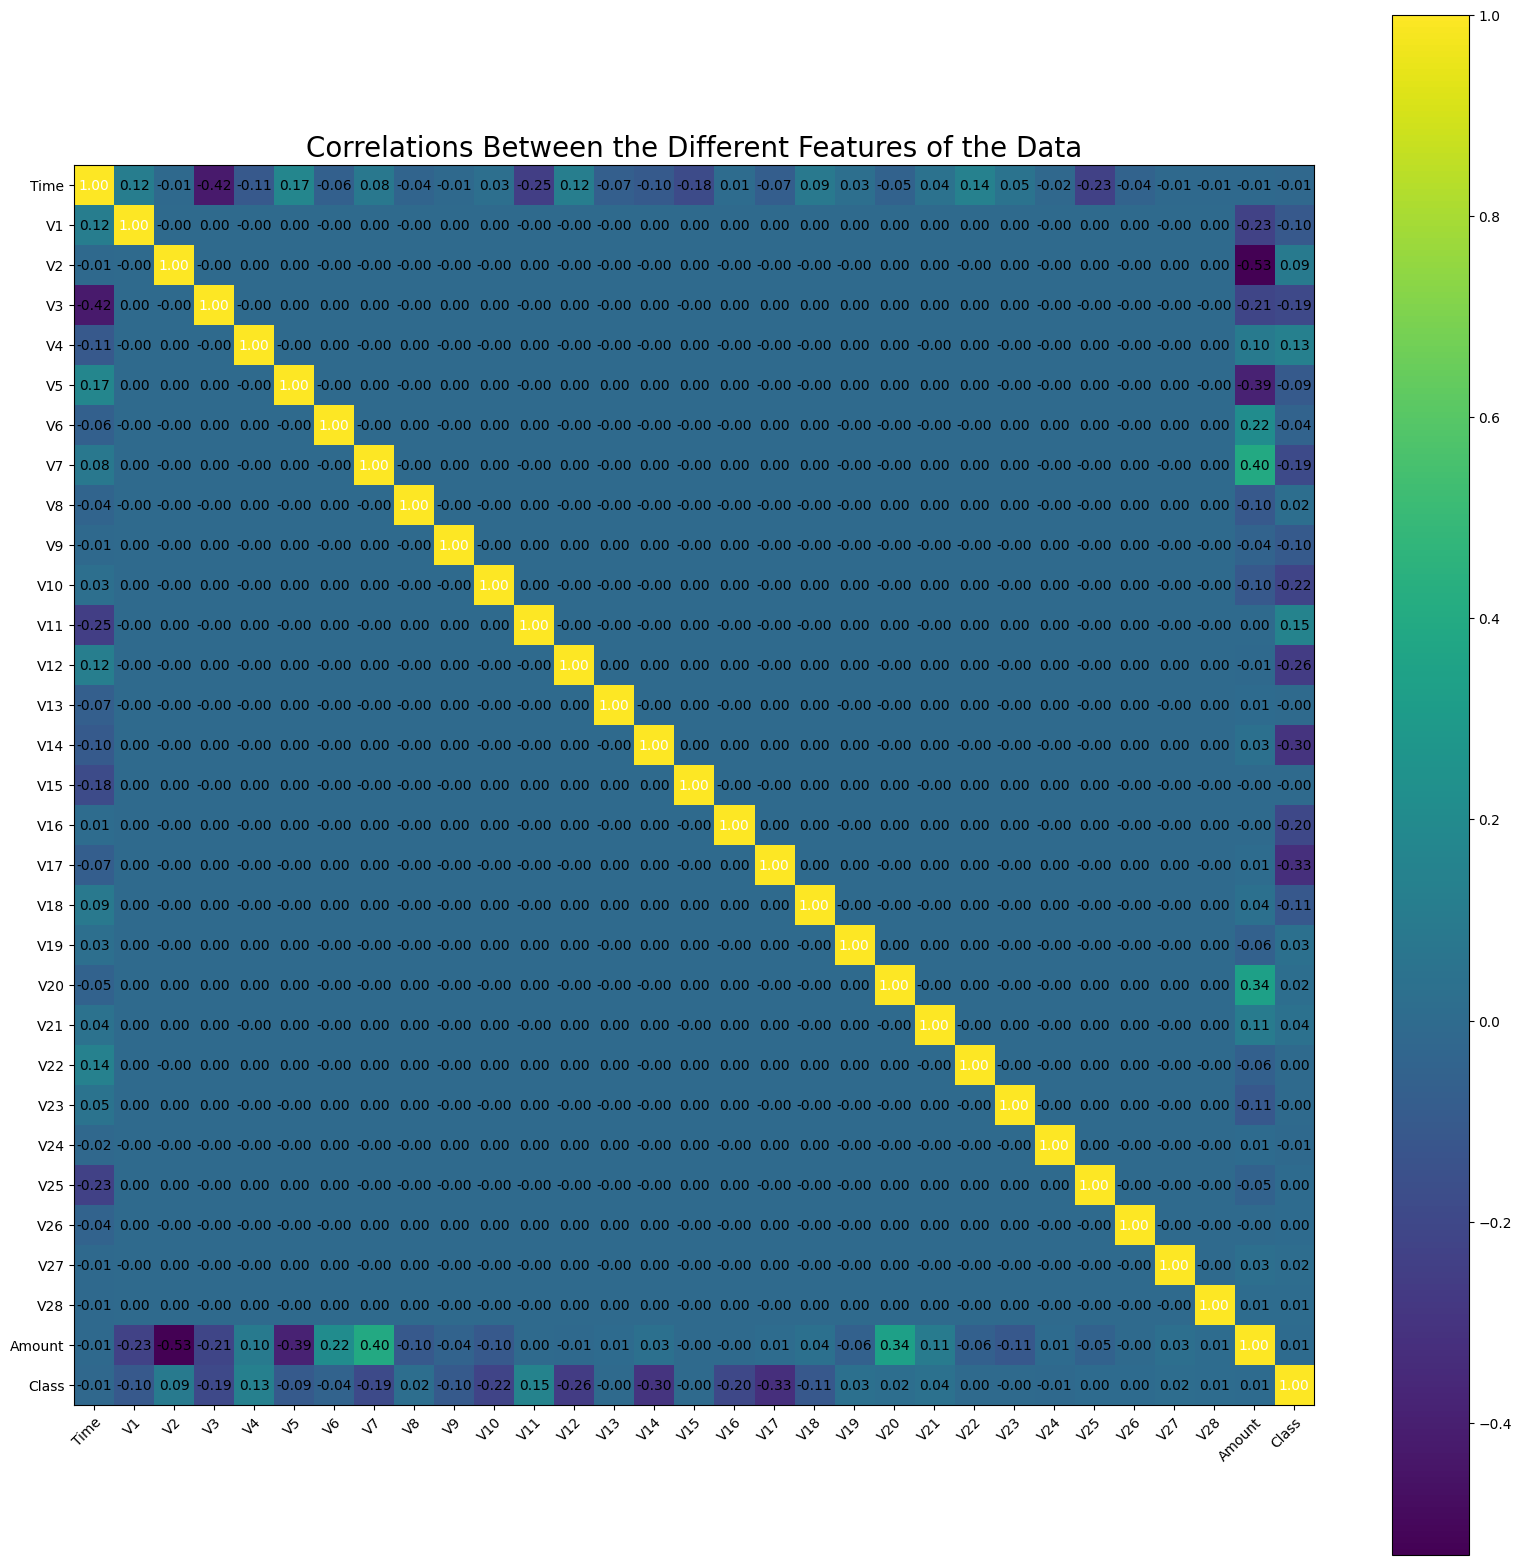

In [17]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(train.values.T)
hm = heatmap(cm, row_names = train.columns, column_names = train.columns, figsize = (20, 20))
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()

In [55]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0,stratify=y )
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

56962 rows in test set vs. 227845 in training set. 30 Features.


In [56]:
X_train_balance, y_train_balance = Balance(X_train, y_train, random_state = 1)
X_test_balance, y_test_balance = Balance(X_test, y_test, random_state = 1)

In [57]:
scale_pos_weight = y.shape[0] / y.sum() - 1
print('Counts of normal transactions / Counts of fraudulent transactions :', scale_pos_weight)

Counts of normal transactions / Counts of fraudulent transactions : 577.8760162601626


In [73]:
X_train_balance = pd.DataFrame(X_train_balance,columns= X_train.columns)

In [72]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [64]:
y_train_balance.shape

(454902,)

In [74]:
# instantiate the classifier
import xgboost as xgb


XG_boost = xgb.XGBRegressor(max_depth=5,eta = 0.1,subsample = 0.8,scale_pos_weight = scale_pos_weight, objective='binary:logistic')
# bst = xgb.cv(param, nfold = 3, num_boost_round = 1000, early_stopping_rounds = 50)

pipeline_model = create_pipeline(XG_boost,data_cleaning)
# fit the model

pipeline_model.fit(X_train_balance, y_train_balance)






Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat_columns',
                                                  Pipeline(steps=[('Encoder',
                                                                   TargetEncoder())]),
                                                  Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')),
                                                 ('num_columns',
                                                  Pipeline(steps=[('imputer'...
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              objective='binary:logistic', ...))])

In [75]:
y_pred = pipeline_model.predict(X_test)

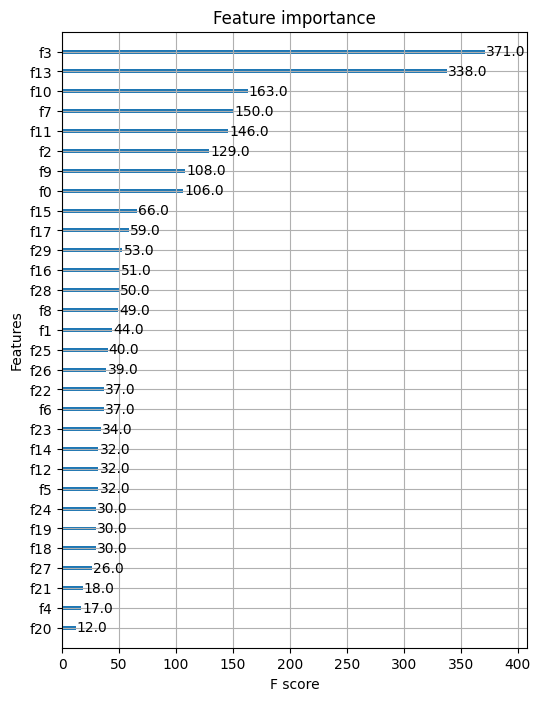

In [76]:
fig, ax = plt.subplots(figsize = (6, 8))
xgb.plot_importance(XG_boost, ax = ax)
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
pipeline_model_logreg = create_pipeline(logreg,data_cleaning)
pipeline_model_logreg.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
y_pred = pipeline_model_logreg.predict(X_test)

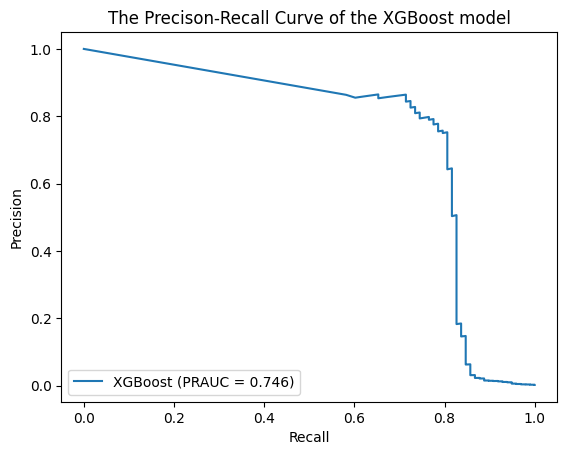

In [77]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred = pipeline_model.predict(X_test)
precision_xgb, recall_xgb, threshold_xgb = precision_recall_curve(y_test, y_pred)
plt.plot(recall_xgb, precision_xgb, label = 'XGBoost (PRAUC = {:.3f})'.format(auc(recall_xgb, precision_xgb)))
plt.title('The Precison-Recall Curve of the XGBoost model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

In [83]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((30, 1), input_shape=(30,)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

In [84]:
model.compile(optimizer = optimizers.RMSprop(), loss = 'binary_crossentropy', metrics = ['mse'])
history = model.fit(X_train_balance, y_train_balance, epochs = 20, batch_size = 32)

Epoch 1/20
14216/14216 [==============================] - 39s 3ms/step - loss: 2.4063 - mse: 0.0854
Epoch 2/20
14216/14216 [==============================] - 44s 3ms/step - loss: 0.2071 - mse: 0.0491
Epoch 3/20
14216/14216 [==============================] - 46s 3ms/step - loss: 0.1603 - mse: 0.0380
Epoch 4/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.1454 - mse: 0.0327
Epoch 5/20
14216/14216 [==============================] - 38s 3ms/step - loss: 0.1457 - mse: 0.0306
Epoch 6/20
14216/14216 [==============================] - 42s 3ms/step - loss: 0.1264 - mse: 0.0260
Epoch 7/20
14216/14216 [==============================] - 40s 3ms/step - loss: 0.1079 - mse: 0.0223
Epoch 8/20
14216/14216 [==============================] - 38s 3ms/step - loss: 0.0739 - mse: 0.0138
Epoch 9/20
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0722 - mse: 0.0103
Epoch 10/20
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0797 - mse: 0.0094

1781/1781 [==============================] - 3s 2ms/step


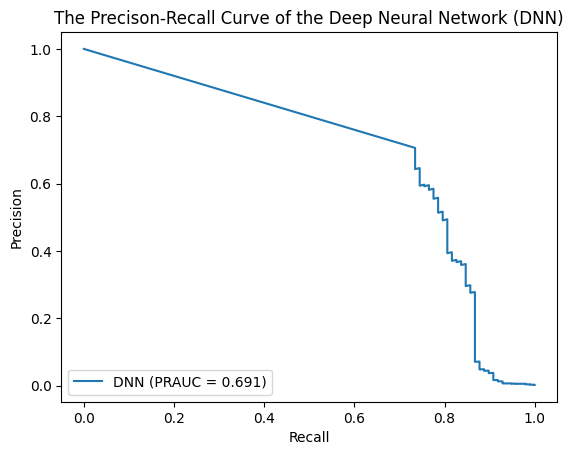

In [85]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = model.predict(X_test)
precision_dnn, recall_dnn, threshold_dnn = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_dnn, precision_dnn, label = 'DNN (PRAUC = {:.3f})'.format(auc(recall_dnn, precision_dnn)))
plt.title('The Precison-Recall Curve of the Deep Neural Network (DNN)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

In [87]:
item={'Time': 109297.0, 'V1': 0.7451171875, 'V2': 2.80859375, 'V3': -5.82421875, 'V4': 5.8359375, 'V5': 0.51220703125, 'V6': -0.61572265625, 'V7': -2.916015625, 'V8': 0.77685546875, 'V9': -1.87890625, 'V10': -4.546875, 'V11': 4.69921875, 'V12': -8.5078125, 'V13': 0.71826171875, 'V14': -7.62890625, 'V15': -2.25, 'V16': -2.55859375, 'V17': -5.3046875, 'V18': -0.95703125, 'V19': -0.58544921875, 'V20': 0.40283203125, 'V21': 0.284912109375, 'V22': -0.87451171875, 'V23': -0.083984375, 'V24': -0.6513671875, 'V25': 0.45458984375, 'V26': 0.050384521484375, 'V27': 0.7568359375, 'V28': 0.3837890625, 'Amount': 0.0}
data_dict = pd.DataFrame.from_dict(item, orient='index').T
prediction = pipeline_model.predict(data_dict)
if (prediction[0] > 0.5):
    prediction = "Fraud"
else:
    prediction = "Not Fraud"
print(prediction)

Fraud


In [86]:
dict_datapoint = {}

for col in X_train_balance.columns:
    dict_datapoint[col] = X_train_balance[col][0]

print(dict_datapoint)

{'Time': 109297.0, 'V1': 0.7451171875, 'V2': 2.80859375, 'V3': -5.82421875, 'V4': 5.8359375, 'V5': 0.51220703125, 'V6': -0.61572265625, 'V7': -2.916015625, 'V8': 0.77685546875, 'V9': -1.87890625, 'V10': -4.546875, 'V11': 4.69921875, 'V12': -8.5078125, 'V13': 0.71826171875, 'V14': -7.62890625, 'V15': -2.25, 'V16': -2.55859375, 'V17': -5.3046875, 'V18': -0.95703125, 'V19': -0.58544921875, 'V20': 0.40283203125, 'V21': 0.284912109375, 'V22': -0.87451171875, 'V23': -0.083984375, 'V24': -0.6513671875, 'V25': 0.45458984375, 'V26': 0.050384521484375, 'V27': 0.7568359375, 'V28': 0.3837890625, 'Amount': 0.0}


In [76]:
unique_vals, counts = np.unique(y_test, return_counts=True)
print(unique_vals)
print(counts)

[0]
[864015]


In [94]:
#oof[test_idx] = preds
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('Classification report:\n',classification_report(y_test,y_pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268696
           1       0.00      0.00      0.00      1543

    accuracy                           1.00   1270239
   macro avg       0.50      0.50      0.50   1270239
weighted avg       1.00      1.00      1.00   1270239

Confusion_matrix:
 [[1268694       2]
 [   1543       0]]


In [65]:
y_test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [96]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model


In [97]:
pipeline_model.save('rfc.h5')

AttributeError: 'Pipeline' object has no attribute 'save'

In [104]:
def export_model(model):
    # Save the model
    joblib_path = 'C:/Users/triet/Bai5/test/'
    with open(joblib_path, 'wb') as file:
        joblib.dump(model, file)
        print(f"Model saved at {joblib_path}")

In [105]:
export_model(pipeline_model)

PermissionError: [Errno 13] Permission denied: 'C:/Users/triet/Bai5/test/'

In [88]:
joblib.dump(pipeline_model, "xgb.pkl")

['xgb.pkl']

In [4]:
model = joblib.load("my_pipeline.pkl")

In [89]:
joblib.dump(model, "cnn.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...layers\reshape
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-18 23:40:50         3076
metadata.json                                  2023-03-18 23:40:50           64
variables.h5                                   2023-03-18 23:40:50       262920


['cnn.pkl']

In [10]:
model = joblib.load("xgb.pkl")

In [11]:
item={'Time': 109297.0, 'V1': 0.7451171875, 'V2': 2.80859375, 'V3': -5.82421875, 'V4': 5.8359375, 'V5': 0.51220703125, 'V6': -0.61572265625, 'V7': -2.916015625, 'V8': 0.77685546875, 'V9': -1.87890625, 'V10': -4.546875, 'V11': 4.69921875, 'V12': -8.5078125, 'V13': 0.71826171875, 'V14': -7.62890625, 'V15': -2.25, 'V16': -2.55859375, 'V17': -5.3046875, 'V18': -0.95703125, 'V19': -0.58544921875, 'V20': 0.40283203125, 'V21': 0.284912109375, 'V22': -0.87451171875, 'V23': -0.083984375, 'V24': -0.6513671875, 'V25': 0.45458984375, 'V26': 0.050384521484375, 'V27': 0.7568359375, 'V28': 0.3837890625, 'Amount': 0.0}
data_dict = pd.DataFrame.from_dict(item, orient='index').T
prediction = model.predict(data_dict)
if (prediction[0] > 0.5):
    prediction = "Fraud"
else:
    prediction = "Not Fraud"
print(prediction)

Fraud
